In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'D:\Downloads\9961_14084_bundle_archive/train.csv')

In [3]:
df_test = pd.read_csv(r'D:\Downloads\9961_14084_bundle_archive/test.csv')

In [4]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [5]:
df.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


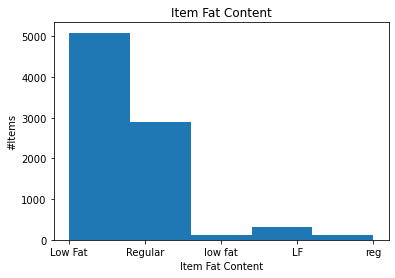

In [8]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
#Variable
ax.hist(df['Item_Fat_Content'],bins = 5)
#Labels and Tit
plt.title('Item Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('#Items')
plt.show()

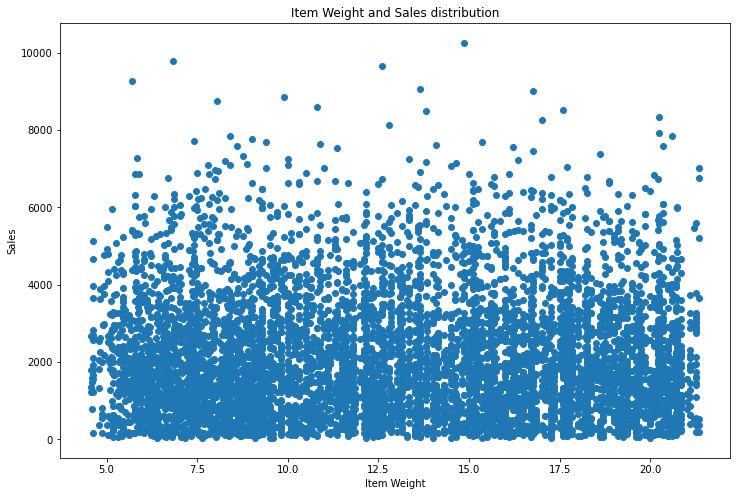

In [9]:
fig=plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
#Variable
ax.scatter(df['Item_Weight'],df['Item_Outlet_Sales'])
#Labels and Tit
plt.title('Item Weight and Sales distribution')
plt.xlabel('Item Weight')
plt.ylabel('Sales')
plt.show()

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

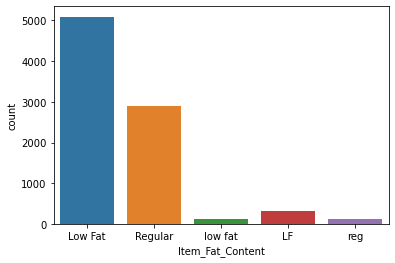

In [10]:
import seaborn as sns
sns.countplot(x='Item_Fat_Content', data=df)

In [11]:
df = df.replace({'Item_Fat_Content':{'LF':'Low Fat', 'low fat':'Low Fat','reg':'Regular'}})


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

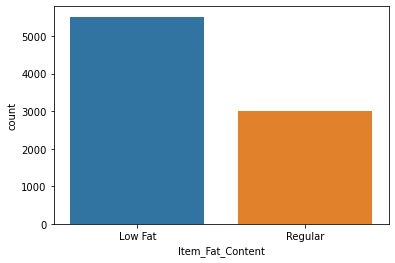

In [12]:
sns.countplot(x='Item_Fat_Content', data=df)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

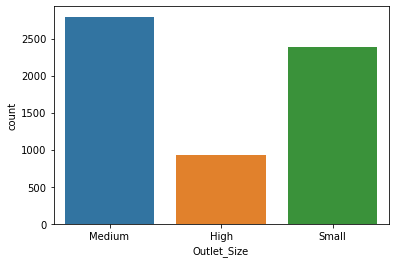

In [13]:
sns.countplot(x='Outlet_Size', data=df)

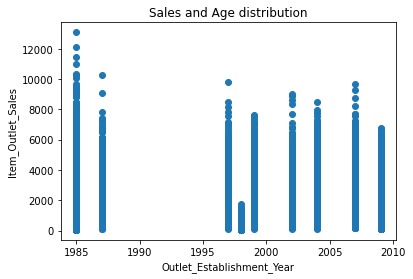

In [14]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
#Variable
ax.scatter(df['Outlet_Establishment_Year'],df['Item_Outlet_Sales'])
#Labels and Tit
plt.title('Sales and Age distribution')
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Item_Outlet_Sales')
plt.show()

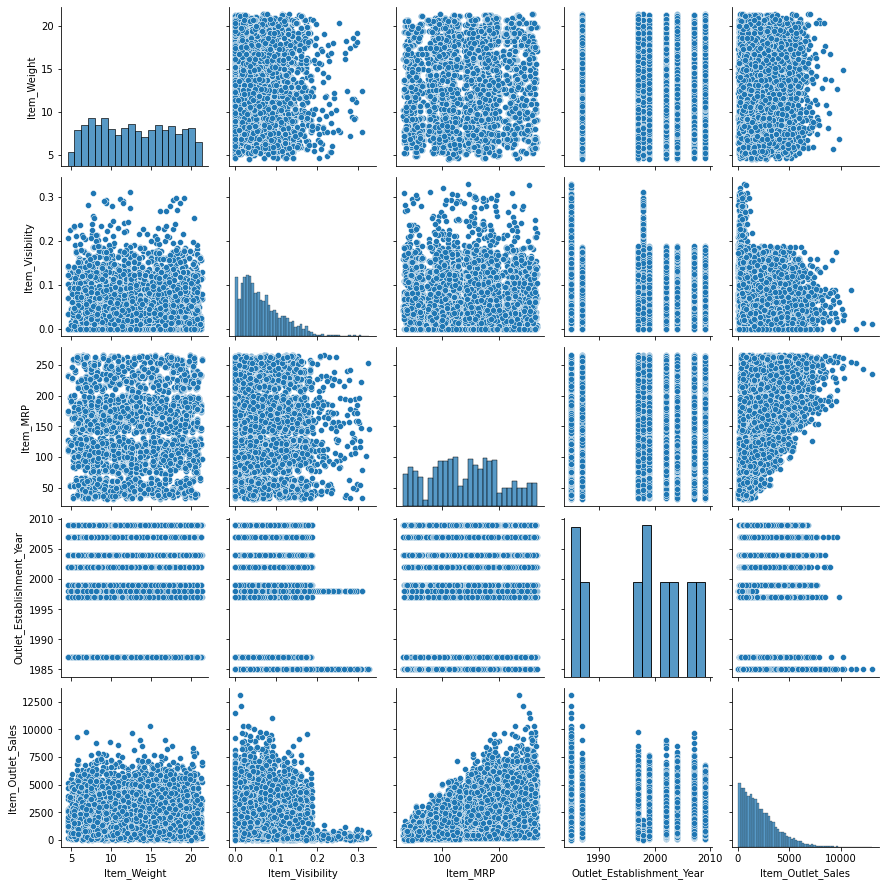

In [15]:
sns.pairplot(df)

In [16]:
test= df.groupby(['Item_Fat_Content'])
test.describe()

Item_Weight                                                  \
                       count       mean       std    min    25%    50%   75%   
Item_Fat_Content                                                               
Low Fat               4566.0  12.937387  4.653787  4.590  8.775  12.65  17.1   
Regular               2494.0  12.711654  4.621851  4.555  8.770  12.50  16.7   

                        Item_Visibility            ...  \
                    max           count      mean  ...   
Item_Fat_Content                                   ...   
Low Fat           21.35          5517.0  0.064330  ...   
Regular           21.20          3006.0  0.069439  ...   

                 Outlet_Establishment_Year         Item_Outlet_Sales  \
                                       75%     max             count   
Item_Fat_Content                                                       
Low Fat                             2004.0  2009.0            5517.0   
Regular                             2004.0  2009.0            3006.0   

                                                                          \
                         mean          std      min       25%        50%   
Item_Fat_Content                                                           
Low Fat           2157.711534  1697.973824  33.2900  826.2578  1765.0358   
Regular           2224.561170  1721.480865  33.9558  857.5504  1844.5989   

                                          
                         75%         max  
Item_Fat_Content                          
Low Fat           3050.69560  13086.9648  
Regular           3198.66965  12117.5600  

[2 rows x 40 columns]

In [17]:
meanWeight = np.mean(df.Item_Weight)     #Using numpy mean function to calculate the mean value
df.Item_Weight = df.Item_Weight.fillna(meanWeight)
meanWeight = np.mean(df_test.Item_Weight)     #Using numpy mean function to calculate the mean value
df_test.Item_Weight = df_test.Item_Weight.fillna(meanWeight)
# meanSize = np.mean(df.Outlet_Size)     #Using numpy mean function to calculate the mean value
# df.Outlet_Size = df.Outlet_Size.fillna(meanSize)


In [18]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:xlabel='Item_Visibility'>

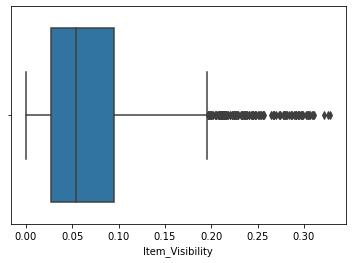

In [19]:
sns.boxplot(x='Item_Visibility', data=df)

In [20]:
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

<AxesSubplot:xlabel='Item_Weight'>

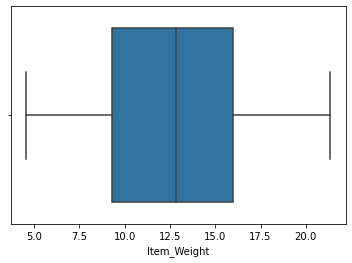

In [21]:
sns.boxplot(x='Item_Weight', data=df)

<AxesSubplot:xlabel='Item_MRP'>

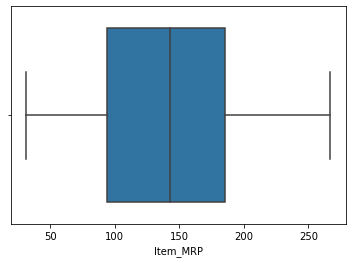

In [22]:
sns.boxplot(x='Item_MRP', data=df)

In [23]:
df.duplicated().sum()
df_test.duplicated().sum()

0

In [24]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace = True)

In [25]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [26]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

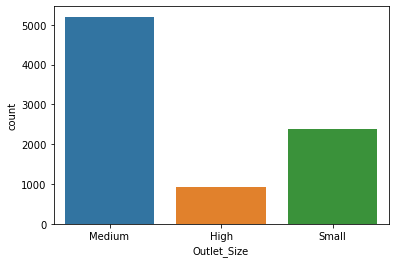

In [27]:
sns.countplot(x='Outlet_Size', data=df)

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

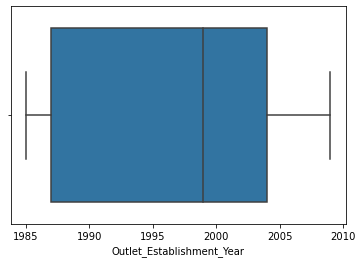

In [28]:
sns.boxplot(x='Outlet_Establishment_Year', data=df)

In [29]:
import plotly.express as px

fig = px.histogram(df, x='Item_Visibility')

fig.show() #as we can see that we have outliers in this feature



In [30]:
import plotly.express as px

fig = px.histogram(df, x='Item_Type')

fig.show()


In [31]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [32]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998      Medium               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [33]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [34]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Item_Type']= label_encoder.fit_transform(df['Item_Type'])
df['Item_Fat_Content']= label_encoder.fit_transform(df['Item_Fat_Content']) 
df['Outlet_Size']= label_encoder.fit_transform(df['Outlet_Size']) 
df['Outlet_Location_Type']= label_encoder.fit_transform(df['Outlet_Location_Type']) 
df['Outlet_Type']= label_encoder.fit_transform(df['Outlet_Type']) 
df['Outlet_Identifier']= label_encoder.fit_transform(df['Outlet_Identifier']) 
df['Item_Identifier']= label_encoder.fit_transform(df['Item_Identifier']) 
df['Item_Identifier'].unique()
############################
df_test['Item_Type']= label_encoder.fit_transform(df_test['Item_Type'])
df_test['Item_Fat_Content']= label_encoder.fit_transform(df_test['Item_Fat_Content']) 
df_test['Outlet_Size']= label_encoder.fit_transform(df_test['Outlet_Size']) 
df_test['Outlet_Location_Type']= label_encoder.fit_transform(df_test['Outlet_Location_Type']) 
df_test['Outlet_Type']= label_encoder.fit_transform(df_test['Outlet_Type']) 
df_test['Outlet_Identifier']= label_encoder.fit_transform(df_test['Outlet_Identifier']) 
df_test['Item_Identifier']= label_encoder.fit_transform(df_test['Item_Identifier']) 


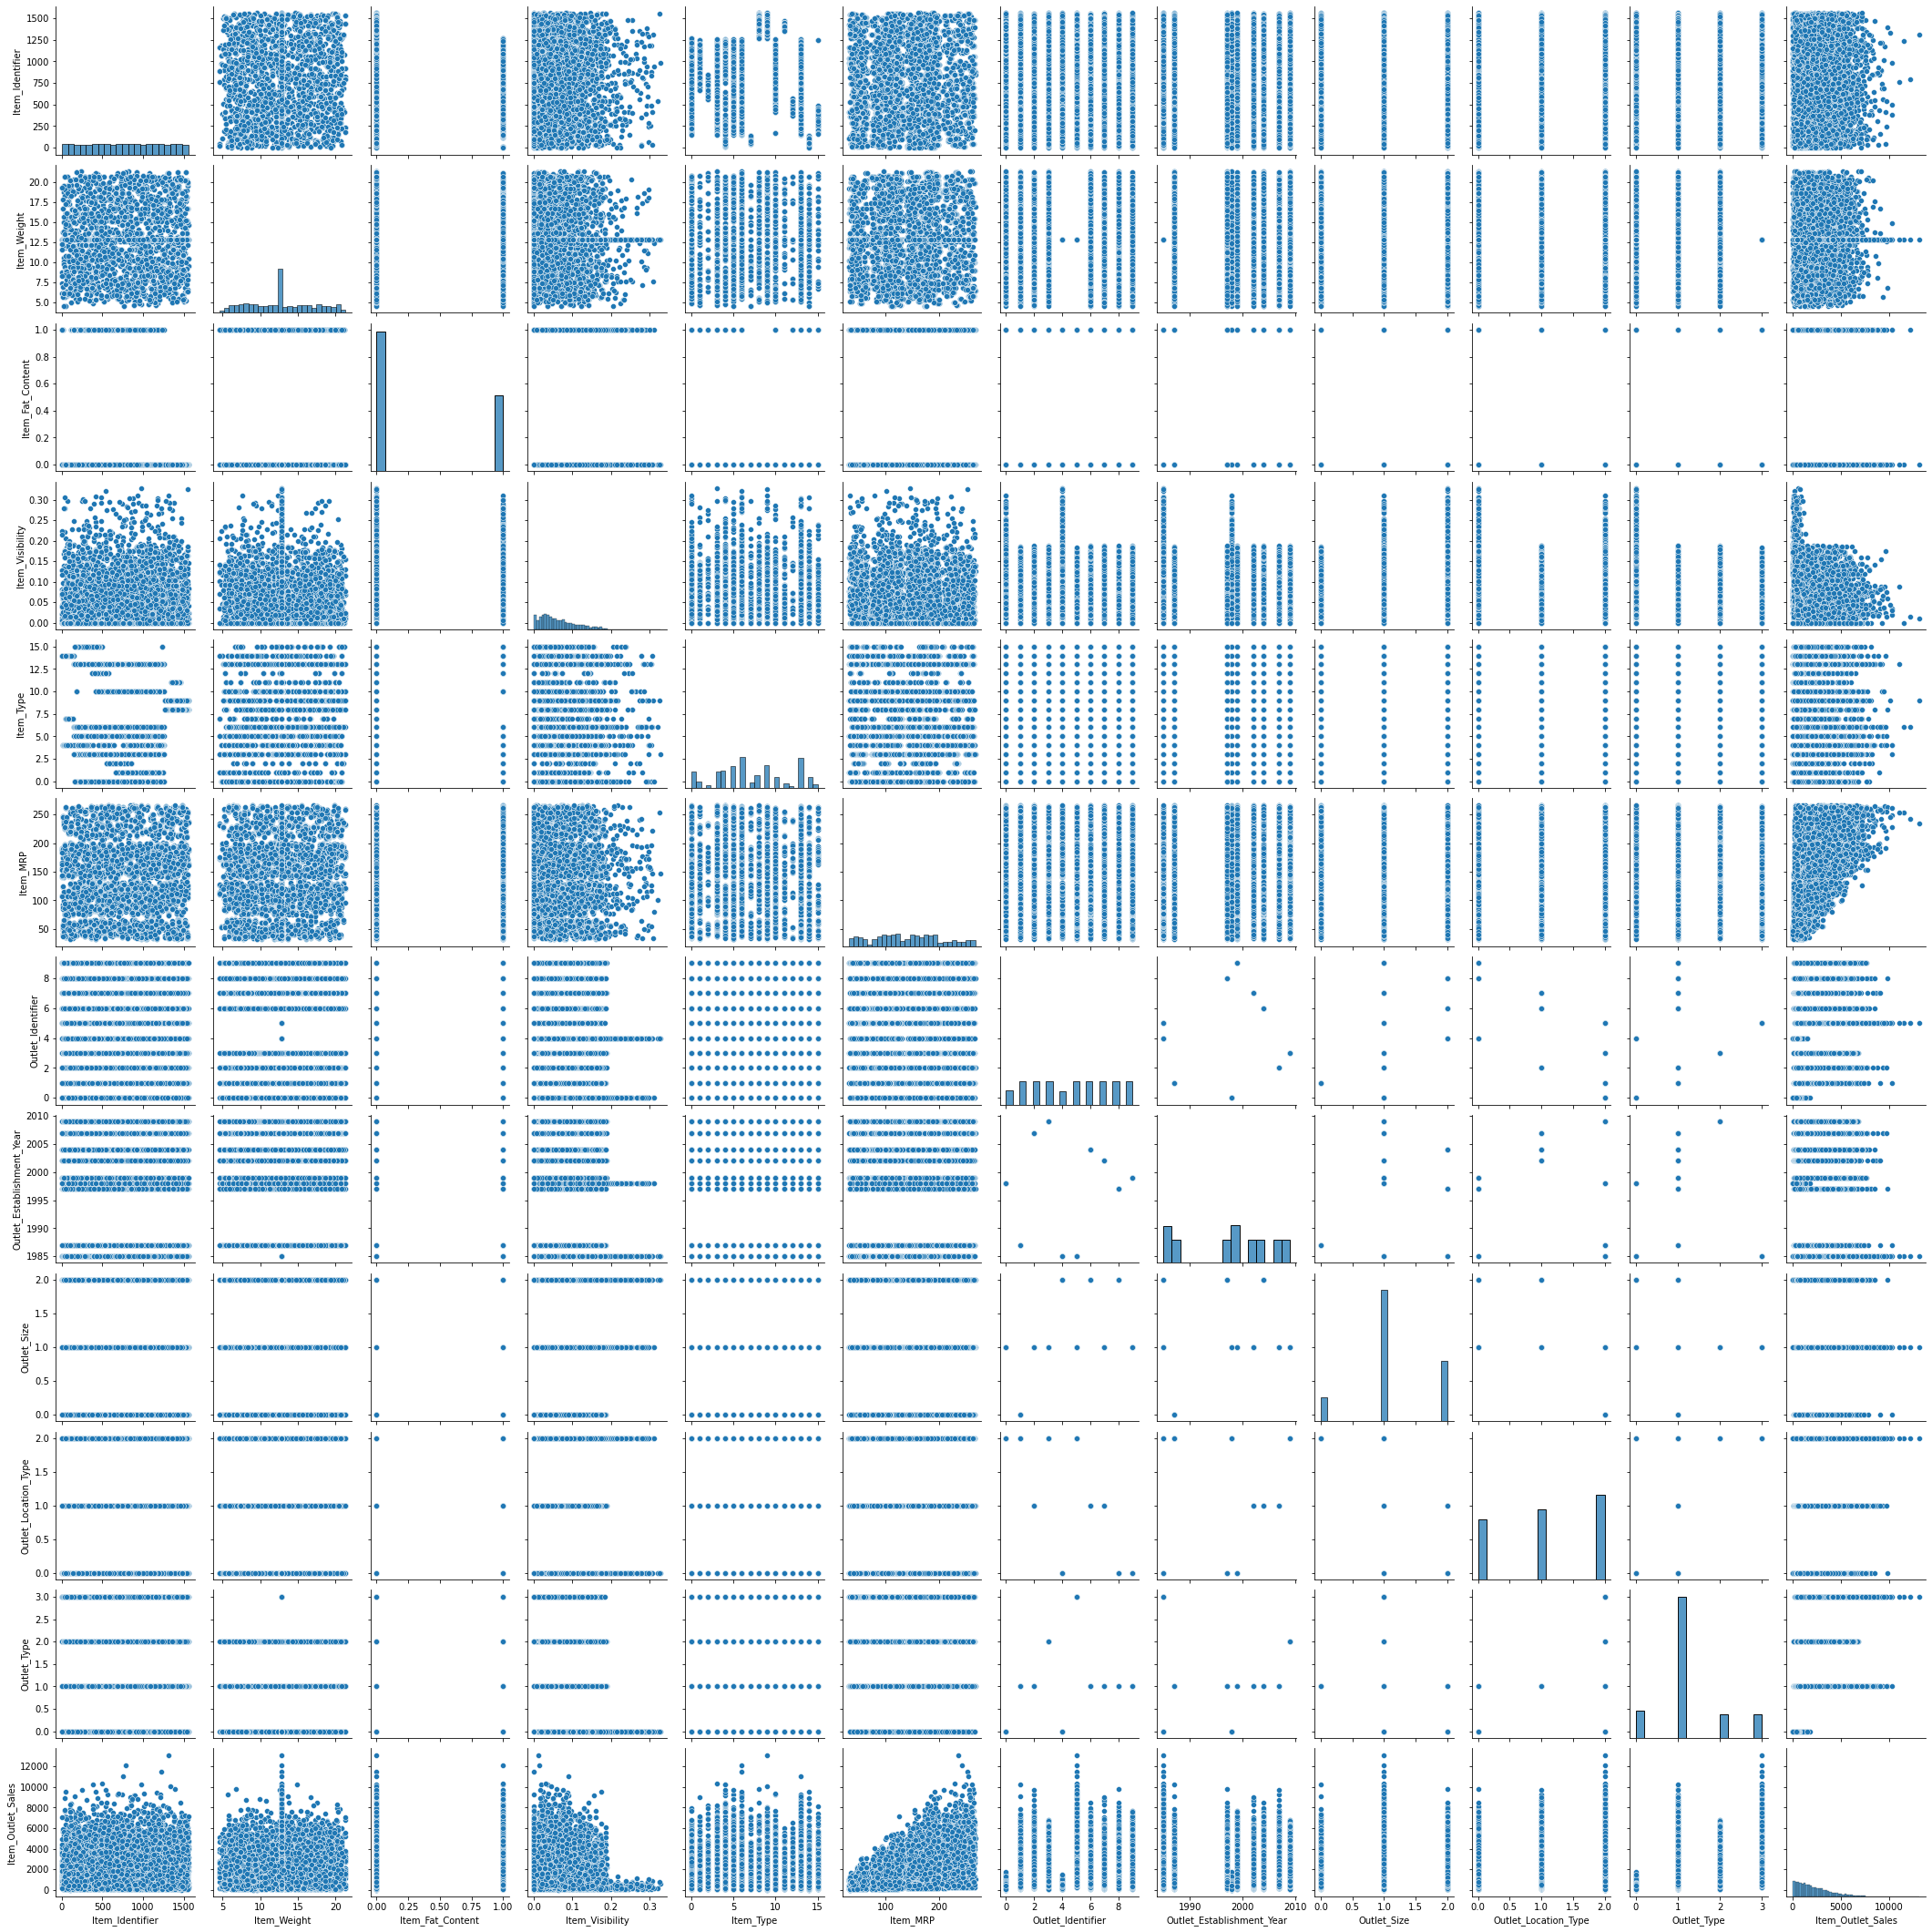

In [35]:
sns.pairplot(df)

In [36]:
df.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0              156         9.30                 0         0.016047          4   
1                8         5.92                 1         0.019278         14   
2              662        17.50                 0         0.016760         10   
3             1121        19.20                 1         0.000000          6   
4             1297         8.93                 0         0.000000          9   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092                  9                       1999            1   
1   48.2692                  3                       2009            1   
2  141.6180                  9                       1999            1   
3  182.0950                  0                       1998            1   
4   53.8614                  1                       1987            0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0                     0            1          3735.1380  
1                     2            2           443.4228  
2                     0            1          2097.2700  
3                     2            0           732.3800  
4                     2            1           994.7052

In [37]:
def r_outliers(df, ft):

    q1=df[ft].quantile(0.25)

    q3 = df[ft].quantile(0.75)

    IQR = q3-q1
    lower = q1 - 1.5*IQR
    upper = q3 + 1.5*IQR
    ls = df.index[(df[ft]< lower) | (df[ft]> upper)] 

    return ls
def outliers(ft):

    q1, q3 =np.nanpercentile(ft , [25,75])

  

    IQR = q3-q1
    lower = q1 - 1.5*IQR
    upper = q3 + 1.5*IQR
    

    return lower, upper

In [38]:
#find outliers using IQR
index_list=[]
for feature in ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']:
    
    index_list.extend(r_outliers(df,feature))



In [39]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [40]:
df_withoutOutliers = remove(df, index_list)

In [41]:
df_withoutOutliers.shape # as seen the outliers removal affected the size of the data greatly we should fill them 

(5577, 12)

In [42]:
for column in ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']:
    
    if df[column].dtype != 'object':
        ll, ul = outliers(df[column])
        df[column] = np.where(df[column] > ul , ul , df[column])
        df[column] = np.where(df[column] < ll , ll , df[column])

In [43]:
df.shape

(8523, 12)

In [44]:
corr_matrix = df.corr()
corr_matrix

Item_Identifier  Item_Weight  Item_Fat_Content  \
Item_Identifier                   1.000000     0.044518         -0.114660   
Item_Weight                       0.044518     1.000000         -0.021157   
Item_Fat_Content                 -0.114660    -0.021157          1.000000   
Item_Visibility                  -0.026757    -0.011928          0.049342   
Item_Type                        -0.017973     0.028015         -0.139434   
Item_MRP                          0.012853     0.024756          0.006063   
Outlet_Identifier                -0.008602    -0.007975          0.000764   
Outlet_Establishment_Year        -0.012772    -0.008301          0.003151   
Outlet_Size                       0.001389    -0.007225         -0.000622   
Outlet_Location_Type              0.003656     0.004088         -0.001598   
Outlet_Type                            NaN          NaN               NaN   
Item_Outlet_Sales                 0.002869     0.011550          0.018719   

                           Item_Visibility  Item_Type  Item_MRP  \
Item_Identifier                  -0.026757  -0.017973  0.012853   
Item_Weight                      -0.011928   0.028015  0.024756   
Item_Fat_Content                  0.049342  -0.139434  0.006063   
Item_Visibility                   1.000000  -0.036213 -0.001163   
Item_Type                        -0.036213   1.000000  0.032651   
Item_MRP                         -0.001163   0.032651  1.000000   
Outlet_Identifier                -0.091872   0.001656  0.003319   
Outlet_Establishment_Year        -0.064105   0.004970  0.005020   
Outlet_Size                       0.061625  -0.001859  0.006059   
Outlet_Location_Type             -0.023894   0.003084  0.000232   
Outlet_Type                            NaN        NaN       NaN   
Item_Outlet_Sales                -0.117918   0.017048  0.567574   

                           Outlet_Identifier  Outlet_Establishment_Year  \
Item_Identifier                    -0.008602                  -0.012772   
Item_Weight                        -0.007975                  -0.008301   
Item_Fat_Content                    0.000764                   0.003151   
Item_Visibility                    -0.091872                  -0.064105   
Item_Type                           0.001656                   0.004970   
Item_MRP                            0.003319                   0.005020   
Outlet_Identifier                   1.000000                   0.079035   
Outlet_Establishment_Year           0.079035                   1.000000   
Outlet_Size                         0.504603                   0.193389   
Outlet_Location_Type               -0.716176                  -0.089216   
Outlet_Type                              NaN                        NaN   
Item_Outlet_Sales                   0.162325                  -0.049135   

                           Outlet_Size  Outlet_Location_Type  Outlet_Type  \
Item_Identifier               0.001389              0.003656          NaN   
Item_Weight                  -0.007225              0.004088          NaN   
Item_Fat_Content             -0.000622             -0.001598          NaN   
Item_Visibility               0.061625             -0.023894          NaN   
Item_Type                    -0.001859              0.003084          NaN   
Item_MRP                      0.006059              0.000232          NaN   
Outlet_Identifier             0.504603             -0.716176          NaN   
Outlet_Establishment_Year     0.193389             -0.089216          NaN   
Outlet_Size                   1.000000             -0.614311          NaN   
Outlet_Location_Type         -0.614311              1.000000          NaN   
Outlet_Type                        NaN                   NaN          NaN   
Item_Outlet_Sales            -0.086182              0.089367          NaN   

                           Item_Outlet_Sales  
Item_Identifier                     0.002869  
Item_Weight                         0.011550  
Item_Fat_Content                  

In [45]:
# corr_matrix['Item_Outlet_Sales'].sort_values(ascending = False)

In [46]:
df.head()


Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0            156.0         9.30               0.0         0.016047        4.0   
1              8.0         5.92               1.0         0.019278       14.0   
2            662.0        17.50               0.0         0.016760       10.0   
3           1121.0        19.20               1.0         0.000000        6.0   
4           1297.0         8.93               0.0         0.000000        9.0   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092                9.0                     1999.0          1.0   
1   48.2692                3.0                     2009.0          1.0   
2  141.6180                9.0                     1999.0          1.0   
3  182.0950                0.0                     1998.0          1.0   
4   53.8614                1.0                     1987.0          0.0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0                   0.0          1.0          3735.1380  
1                   2.0          1.0           443.4228  
2                   0.0          1.0          2097.2700  
3                   2.0          1.0           732.3800  
4                   2.0          1.0           994.7052

In [47]:
from sklearn.model_selection import train_test_split

x = df.drop(['Item_Outlet_Sales'], axis = 1)
y = df['Item_Outlet_Sales']

x_train, x_test , y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 42)

In [48]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(type(y_train))

(6818, 11)
(6818,)
(1705, 11)
(1705,)
<class 'pandas.core.series.Series'>


In [49]:
y_train.head()

549     2386.2272
7757    3103.9596
764     1125.2020
6867     284.2966
2716    4224.5010
Name: Item_Outlet_Sales, dtype: float64

In [50]:
x_train.iloc[:,1:6:2].head()

Item_Weight  Item_Visibility  Item_MRP
549         9.500         0.035206  171.3448
7757       18.000         0.047473  170.5422
764        17.600         0.076122  111.7202
6867        8.325         0.029845   41.6138
2716       12.850         0.137228  155.5630

In [51]:
y_test.head()

7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
Name: Item_Outlet_Sales, dtype: float64

In [52]:
x_test.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
7503            487.0    14.300000               0.0         0.026300   
2957           1392.0     7.930000               0.0         0.071136   
7031            244.0    14.500000               1.0         0.041313   
1084             14.0    12.857645               1.0         0.044767   
856             890.0    10.195000               1.0         0.012456   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
7503        5.0   79.4302                1.0                     1987.0   
2957        8.0   42.7086                8.0                     1997.0   
7031        3.0   42.0454                9.0                     1999.0   
1084       14.0  173.7054                5.0                     1985.0   
856        10.0  197.5110                6.0                     2004.0   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  
7503          0.0                   2.0          1.0  
2957          2.0                   0.0          1.0  
7031          1.0                   0.0          1.0  
1084          1.0                   2.0          1.0  
856           2.0                   1.0          1.0

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# we only aply the feature scaling on the features other than dummy variables.
x_train.iloc[:,1:8:2] = sc.fit_transform(x_train.iloc[:,1:8:2])
x_test.iloc[:,1:8:2] = sc.fit_transform(x_test.iloc[:,1:8:2])


In [54]:
x_train.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
549            1102.0    -0.800211               1.0        -0.617690   
7757           1322.0     1.211317               0.0        -0.365737   
764            1169.0     1.116657               1.0         0.222669   
6867            789.0    -1.078275               0.0        -0.727790   
2716            757.0    -0.007432               0.0         1.477705   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
549         6.0  0.470709                9.0                   0.136169   
7757        9.0  0.457877                7.0                   0.493521   
764        10.0 -0.482625                8.0                  -0.102066   
6867        6.0 -1.603553                7.0                   0.493521   
2716       13.0  0.218375                8.0                  -0.102066   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  
549           1.0                   0.0          1.0  
7757          1.0                   1.0          1.0  
764           2.0                   0.0          1.0  
6867          1.0                   1.0          1.0  
2716          2.0                   0.0          1.0

In [55]:
x_test.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
7503            487.0     0.363833               0.0        -0.791260   
2957           1392.0    -1.143691               0.0         0.115763   
7031            244.0     0.411165               1.0        -0.487542   
1084             14.0     0.022486               1.0        -0.417672   
856             890.0    -0.607656               1.0        -1.071321   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
7503        5.0 -0.948848                1.0                  -1.296972   
2957        8.0 -1.550483                8.0                  -0.088459   
7031        3.0 -1.561349                9.0                   0.153244   
1084       14.0  0.595726                5.0                  -1.538675   
856        10.0  0.985749                6.0                   0.757500   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  
7503          0.0                   2.0          1.0  
2957          2.0                   0.0          1.0  
7031          1.0                   0.0          1.0  
1084          1.0                   2.0          1.0  
856           2.0                   1.0          1.0

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)

r_sq = model.score(x_train, y_train)
print('Acuuraccy for Linear Regression on train data : %.3f' %  (100*r_sq)+"%")
r_test = model.score(x_test, y_test)
print('Acuuraccy for Linear Regression on test data: %.3f' %  (100*r_test)+"%")

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(f"Mean Square Error : {rmse}") 
print(f"Mean Ansolute Error : {mae}") 

Acuuraccy for Linear Regression on train data : 44.508%
Acuuraccy for Linear Regression on test data: 44.287%
Mean Square Error : 1230.5488044019635
Mean Ansolute Error : 936.3862462850657


In [57]:
y_pred[:5]

array([1400.00456441,  529.0047951 , 1171.41474186, 3781.98032465,
       3328.38820528])

In [61]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

modell = make_pipeline(PolynomialFeatures(degree=3), LinearRegression(fit_intercept = False))
modell.fit(x_train,y_train)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(modell, x_train, y_train, 
                           scoring='neg_mean_absolute_error', 
                           cv=cv, n_jobs=-1, error_score='raise')
#print(model.named_steps.linearregression.coef_)
y_pred = modell.predict(x_test)
r_sq = modell.score(x_train, y_train)

print('Acuuraccy for Polynomial Linear Regression on train data : %.3f' %  (100*r_sq)+"%")
r_test = modell.score(x_test, y_test)
print('Acuuraccy for Polynomial Linear Regression on test data : %.3f' %  (100*r_test)+"%")

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(-n_scores)
print(f"Mean Square Error : {max(rmse)}") 
print(f"Mean Ansolute Error : {mae}") 

Acuuraccy for Polynomial Linear Regression on train data : 61.407%
Acuuraccy for Polynomial Linear Regression on test data : 60.103%
Mean Square Error : 28.789763385282104
Mean Ansolute Error : 738.1186548566111


In [62]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate    
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

ridge = make_pipeline(PolynomialFeatures(degree=3),
                      Ridge(alpha=10))

cv_results = cross_validate(ridge, x_train, y_train,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True, return_estimator=True)


ridge.fit(x_train, y_train)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(ridge, x_train, y_train, 
                           scoring='neg_mean_absolute_error', 
                           cv=cv, n_jobs=-1, error_score='raise')
y_pred = ridge.predict(x_test)

r_sq = ridge.score(x_train, y_train)
print('Acuuraccy for Ridge on train data :: %.3f' %  (100*r_sq)+"%")

r_test = ridge.score(x_test, y_test)
print('Acuuraccy for Ridge on test data:: %.3f' %  (100*r_test)+"%")
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(-n_scores)
print(f"Mean Square Error : {max(rmse)}") 
print(f"Mean Ansolute Error : {mae}") 


Acuuraccy for Ridge on train data :: 61.406%
Acuuraccy for Ridge on test data:: 60.157%
Mean Square Error : 28.781717255940006
Mean Ansolute Error : 736.9085722037037


In [63]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
# define dataset

model = RandomForestRegressor()

# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model.fit(x_train,y_train)
n_scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(-n_scores)
print(f"MSE for Random Forest : {max(rmse)}") 
print(f"MAE for Random Forest : {mae}") 

# print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MSE for Random Forest : 29.573923034359655
MAE for Random Forest : 755.2840588879766


In [64]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 500, max_depth = 5,random_state = 0)
regressor.fit(x_train,y_train)


cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(regressor, x_train, y_train, 
                           scoring='neg_mean_absolute_error', 
                           cv=cv, n_jobs=-1, error_score='raise')

y_pred = regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(-n_scores)
print(f"MSE for Random Forest with increased number of extimators : {max(rmse)}") 
print(f"MAE for Random Forest with increased number of extimators : {mae}") 


MSE for Random Forest with increased number of extimators : 29.14795787941252
MAE for Random Forest with increased number of extimators : 739.4009931004666


In [65]:
from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

models = XGBRegressor()
models.fit(x_train, y_train)

# make predictions for test data
y_pred = models.predict(x_test)
predictions = [round(value) for value in y_pred]


cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(models, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

y_pred = models.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(-n_scores)
print(f"MSE for XGB  :  {max(rmse)}") 
print(f"MAE for XGB : {mae}") 


MSE for XGB  :  20.993244978054843
MAE for XGB : 932.5722160761925
